<a href="https://colab.research.google.com/github/tejeshbhalla/tensorflow_projects/blob/master/road_signs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

import pickle
import numpy as np
import pandas as pd 
import tensorflow as tf
from sklearn.metrics import classification_report
import os
import matplotlib.pyplot as plt
import cv2
import sklearn as sk
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Input,BatchNormalization
from tensorflow.keras.models import Sequential

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [6]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [7]:
import csv

In [8]:
with open("/content/german-traffic-signs/signnames.csv") as file:
  output=csv.reader(file)
  y=[i[1] for i in output]

y=y[1:]
print(len(y))

43


In [9]:
with open('/content/german-traffic-signs/test.p','rb') as file:
  test_data=(pickle.load(file))

with open('/content/german-traffic-signs/train.p','rb') as file:
  train_data=(pickle.load(file))

with open('/content/german-traffic-signs/valid.p','rb') as file:
  valid_data=(pickle.load(file))
  

In [10]:
X_train,X_test,X_valid=train_data['features'],test_data['features'],valid_data['features']
y_train,y_test,y_valid=train_data['labels'],test_data['labels'],valid_data['labels']

In [11]:
print(f'shapes are as follows {X_train.shape,y_train.shape},{X_test.shape,y_test.shape},{X_valid.shape,y_valid.shape}')

shapes are as follows ((34799, 32, 32, 3), (34799,)),((12630, 32, 32, 3), (12630,)),((4410, 32, 32, 3), (4410,))


In [12]:
df=pd.read_csv('/content/german-traffic-signs/signnames.csv')

In [13]:
df.head()

counts=np.unique(df['ClassId'],return_counts='True')

<BarContainer object of 43 artists>

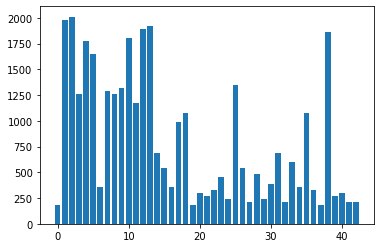

In [14]:
 i,j =np.unique(y_train,return_counts=True)

 plt.bar(i,j)

In [15]:
def preprocess(img):
  grayscale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=cv2.equalizeHist(grayscale)

  img=img/255.0
  return img

In [16]:
X_train,X_test,X_valid=list(map(preprocess,X_train)),list(map(preprocess,X_test)),list(map(preprocess,X_valid))

In [17]:
X_train,X_test,X_valid=np.expand_dims(X_train,axis=-1),np.expand_dims(X_test,axis=-1),np.expand_dims(X_valid,axis=-1)





In [18]:
X_train.shape

(34799, 32, 32, 1)

In [27]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,1)))
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,1)))
model.add(MaxPool2D())
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(BatchNormalization())

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation='relu',kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(43,activation='softmax'))

In [28]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)         

In [30]:
r=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1088/1088 [==============================] - 6s 6ms/step - loss: 2.6074 - accuracy: 0.8232 - val_loss: 0.9477 - val_accuracy: 0.8892
Epoch 2/10
1088/1088 [==============================] - 6s 6ms/step - loss: 0.6754 - accuracy: 0.9664 - val_loss: 0.8161 - val_accuracy: 0.9390
Epoch 3/10
1088/1088 [==============================] - 6s 6ms/step - loss: 0.6649 - accuracy: 0.9724 - val_loss: 0.6805 - val_accuracy: 0.9476
Epoch 4/10
1088/1088 [==============================] - 6s 6ms/step - loss: 0.5739 - accuracy: 0.9795 - val_loss: 0.6534 - val_accuracy: 0.9568
Epoch 5/10
1088/1088 [==============================] - 6s 6ms/step - loss: 0.6102 - accuracy: 0.9788 - val_loss: 0.6392 - val_accuracy: 0.9488
Epoch 6/10
1088/1088 [==============================] - 6s 6ms/step - loss: 0.5009 - accuracy: 0.9838 - val_loss: 0.8308 - val_accuracy: 0.9526
Epoch 7/10
1088/1088 [==============================] - 6s 6ms/step - loss: 0.5389 - accuracy: 0.9853 - val_loss: 0.5150 - val_accuracy:

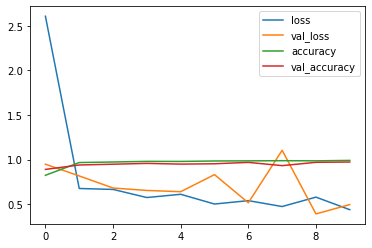

In [35]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [40]:
np.mean(y_test==np.argmax(model.predict(X_test),axis=1))

0.972209026128266

In [56]:
image=cv2.imread('/content/C50F31.jpg')
image=preprocess(image)
image=cv2.resize(image,(32,32),cv2.INTER_CUBIC)
image=np.array([image])
image=np.expand_dims(image,axis=-1)

np.argmax(model.predict(image))

38

In [57]:
y[38]

'Keep right'

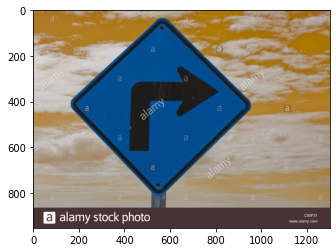

In [58]:
plt.imshow(cv2.imread('/content/C50F31.jpg'))